In [19]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import PoissonRegressor
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error,mean_absolute_error

In [2]:
Dataset_path = "./DataSets/"
Movies_metadata = pd.read_csv(Dataset_path+"MoviesInfo.csv")
ratings = pd.read_csv(Dataset_path+"ml-latest/ratings.csv")

In [3]:
Movies_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41896 entries, 0 to 41895
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   movieId                41896 non-null  int64  
 1   genres                 41896 non-null  object 
 2   imdb_title_id          41896 non-null  object 
 3   title                  41896 non-null  object 
 4   original_title         41896 non-null  object 
 5   year                   41896 non-null  int64  
 6   date_published         41896 non-null  object 
 7   genre                  41896 non-null  object 
 8   duration               41896 non-null  int64  
 9   country                41890 non-null  object 
 10  language               41648 non-null  object 
 11  director               41886 non-null  object 
 12  writer                 41621 non-null  object 
 13  production_company     40944 non-null  object 
 14  actors                 41877 non-null  object 
 15  de

In [4]:
Movies_metadata['mean_vote'].describe()

count    41896.000000
mean         6.379342
std          1.036597
min          1.300000
25%          5.800000
50%          6.500000
75%          7.100000
max          9.400000
Name: mean_vote, dtype: float64

In [5]:
obj_Movies_metadata = Movies_metadata.select_dtypes(include=['object']).copy()
obj_Movies_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41896 entries, 0 to 41895
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   genres                 41896 non-null  object
 1   imdb_title_id          41896 non-null  object
 2   title                  41896 non-null  object
 3   original_title         41896 non-null  object
 4   date_published         41896 non-null  object
 5   genre                  41896 non-null  object
 6   country                41890 non-null  object
 7   language               41648 non-null  object
 8   director               41886 non-null  object
 9   writer                 41621 non-null  object
 10  production_company     40944 non-null  object
 11  actors                 41877 non-null  object
 12  description            41589 non-null  object
 13  budget                 15453 non-null  object
 14  usa_gross_income       13291 non-null  object
 15  worlwide_gross_inco

In [6]:
myobj = ['country','language','director','production_company']

for i in myobj:
    obj_Movies_metadata[i] = obj_Movies_metadata[i].astype('category')
    Movies_metadata[i] = obj_Movies_metadata[i].cat.codes


In [7]:
Movies_metadata = Movies_metadata.fillna(100000)
Movies_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41896 entries, 0 to 41895
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   movieId                41896 non-null  int64  
 1   genres                 41896 non-null  object 
 2   imdb_title_id          41896 non-null  object 
 3   title                  41896 non-null  object 
 4   original_title         41896 non-null  object 
 5   year                   41896 non-null  int64  
 6   date_published         41896 non-null  object 
 7   genre                  41896 non-null  object 
 8   duration               41896 non-null  int64  
 9   country                41896 non-null  int16  
 10  language               41896 non-null  int16  
 11  director               41896 non-null  int16  
 12  writer                 41896 non-null  object 
 13  production_company     41896 non-null  int16  
 14  actors                 41896 non-null  object 
 15  de

In [8]:
data =  Movies_metadata[['movieId','year','duration','metascore','reviews_from_users','reviews_from_critics'
                              ,'country','language','director','production_company','mean_vote']]

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled = scaler.fit_transform(data.drop(['movieId','mean_vote'],axis=1))
data_norm = pd.DataFrame(scaled,columns=(data.drop(['movieId','mean_vote'],axis=1).columns))
data_norm= data_norm.join(data['mean_vote'])
data_norm= data_norm.join(data['movieId'])


from scipy import stats
z_scores = stats.zscore(data_norm.drop(['movieId','mean_vote'],axis=1))
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
newdata = data_norm[filtered_entries]

newdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38725 entries, 0 to 41894
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year                  38725 non-null  float64
 1   duration              38725 non-null  float64
 2   metascore             38725 non-null  float64
 3   reviews_from_users    38725 non-null  float64
 4   reviews_from_critics  38725 non-null  float64
 5   country               38725 non-null  float64
 6   language              38725 non-null  float64
 7   director              38725 non-null  float64
 8   production_company    38725 non-null  float64
 9   mean_vote             38725 non-null  float64
 10  movieId               38725 non-null  int64  
dtypes: float64(10), int64(1)
memory usage: 3.5 MB


In [10]:
pd.options.mode.chained_assignment = None

newdata['mean_vote_class'] = 0
newdata['mean_vote_class'][newdata['mean_vote']>=6.5] = 1
newdata['mean_vote_class'][newdata['mean_vote']<6.5] = 0

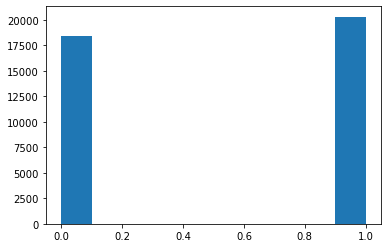

In [11]:
plt.hist(newdata['mean_vote_class'])
plt.show()

### Regression on  mean_vote_class

In [22]:
target = newdata['mean_vote_class'] 
predictors = newdata.drop(['mean_vote','mean_vote_class','movieId'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.30, random_state=40)

In [23]:
model01 = LogisticRegression().fit(X_train,y_train)

In [25]:
y_pred01 = model01.predict(X_test)

In [26]:
print('MSE:',mean_squared_error(y_test, y_pred01))
print('MAE:',mean_absolute_error(y_test, y_pred01))
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred01)))

MSE: 0.3212256842830091
MAE: 0.3212256842830091
RMSE: 0.5667677516258394


### Regression on  mean_vote

In [27]:
target = newdata['mean_vote'] 
predictors = newdata.drop(['mean_vote','mean_vote_class','movieId'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.30, random_state=40)

### Poisson Regression

In [28]:
model02 = PoissonRegressor().fit(X_train, y_train)

In [29]:
y_pred02 = model02.predict(X_test)

In [30]:
print('MSE:',mean_squared_error(y_test, y_pred02))
print('MAE:',mean_absolute_error(y_test, y_pred02))
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred02)))

MSE: 0.8101307760735601
MAE: 0.6916354065451815
RMSE: 0.9000726504419296


### Linear Regression

In [32]:
model03 = LinearRegression().fit(X_train, y_train)

In [33]:
y_pred03 = model03.predict(X_test)

In [34]:
print('MSE:',mean_squared_error(y_test, y_pred03))
print('MAE:',mean_absolute_error(y_test, y_pred03))
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred03)))

MSE: 0.7835591273010358
MAE: 0.6785797345499395
RMSE: 0.8851887523579566
